In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Vamos a aprender como usar métodos de regresión para obtener la importancia de las variables que pudieran ayudar a crear modelos de predicción para diferentes situaciones en los que tengamos datos de un cierto fenómenos que está determinado (inicialmente) por un conjunto de variables. Esta metodología  es una parte de machine learnig. Algunas otras metodologías de estadística (que vimos anteriormente) también se aproximan a hacer esto y las vimos como PCA Principal Component Analysis o Análisis de Componentes Principales.  Vamos a mirar otra forma de hacerlo usando Machine Learning. Vamos a ello.

Primero que nada vamos a usar un conjunto de datos que ha sido recogido en Brasil  para la descripción del tráfico de vehículos en la ciudad de Sao Paulo. El conjunto de datos está disponible en https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil. Podemos descargarlos y yo lo tengo acá en la carpeta adjunta. 

## Información del conjunto de datos:

La base de datos fue creada con registros del comportamiento del tráfico urbano de la ciudad de Sao Paulo en Brasil del 14 de diciembre de 2009 al 18 de diciembre de 2009 (De lunes a viernes). Registrado de 7:00 a 20:00 cada 30 minutos. El conjunto de datos Comportamiento del tráfico urbano de la ciudad de Sao Paulo en Brasil fue utilizado en la investigación académica en la Universidade Nove de Julho - Programa de Postgrado en Informática y Gestión del Conocimiento.

In [2]:
data=pd.read_csv("data/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv",delimiter=";")

In [3]:
data["Slowness in traffic (%)"]=data["Slowness in traffic (%)"].str.replace(",",".")
data["Slowness in traffic (%)"]=data["Slowness in traffic (%)"].astype(np.float64)

En este conjunto de datos la variable a predecir es `Slowness in traffic (%)` o la lentitud del tráfico expresado en porcentaje, y se hace en términos de 16 variables que se miden en campo.

In [4]:
data=data.drop(columns=["Hour (Coded)"])

In [5]:
data

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


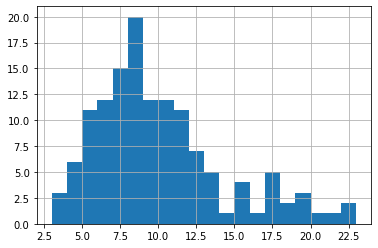

In [42]:
data["Slowness in traffic (%)"].hist(bins=np.arange(3,24,1))
plt.show()

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Immobilized bus,135.0,0.340741,0.659749,0.0,0.0,0.0,1.00,4.0
Broken Truck,135.0,0.874074,1.102437,0.0,0.0,1.0,1.00,5.0
Vehicle excess,135.0,0.029630,0.170195,0.0,0.0,0.0,0.00,1.0
Accident victim,135.0,0.422222,0.696116,0.0,0.0,0.0,1.00,3.0
Running over,135.0,0.118519,0.346665,0.0,0.0,0.0,0.00,2.0
Fire vehicles,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Occurrence involving freight,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Incident involving dangerous freight,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Lack of electricity,135.0,0.118519,0.504485,0.0,0.0,0.0,0.00,4.0
Fire,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0


Hagamos algunas visualizaciones primeras.

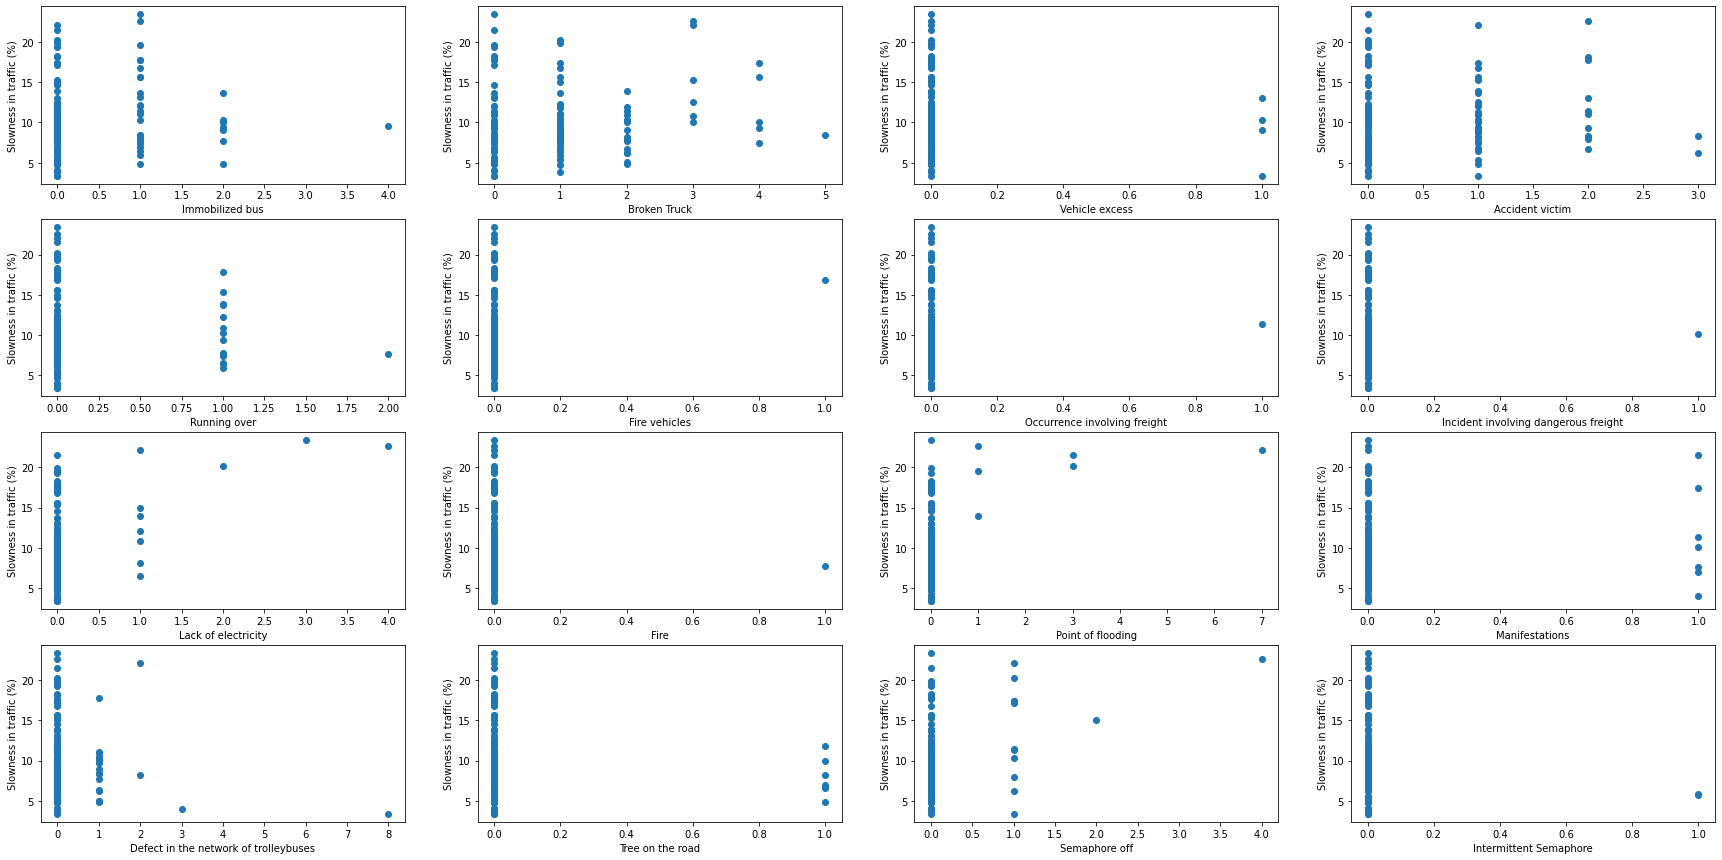

In [7]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["Slowness in traffic (%)"])
    plt.xlabel(j)
    plt.ylabel("Slowness in traffic (%)")
plt.show()

El contenido de las variables predictoras es categórico, básicamente presencia o ausencia de una características o posibilidades distintas de dicha característica.

Ahora lo que queremos es hacer por ejemplo una regresión para determinar si la variable "Slowness in traffic (%)" puede ser predicha en término de las 16 anteriores variables. Es posible que lo podamos hacer. Veamos por ejemplo una regresión sencilla usando statmodels de python:

In [8]:
import statsmodels.api as sm

In [9]:
Y = data["Slowness in traffic (%)"]
X = data.drop(columns=["Slowness in traffic (%)"])
X = sm.add_constant(X)

In [10]:
X

,const,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
131,1.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
132,1.0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
133,1.0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
model_linear = sm.OLS(Y, X).fit() # Ordinary Least Square
predictions_SM = model_linear.predict(X) 

In [12]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Slowness in traffic (%)   R-squared:                       0.376
Model:                                 OLS   Adj. R-squared:                  0.291
Method:                      Least Squares   F-statistic:                     4.438
Date:                     Fri, 10 Jun 2022   Prob (F-statistic):           8.59e-07
Time:                             17:54:27   Log-Likelihood:                -358.14
No. Observations:                      135   AIC:                             750.3
Df Residuals:                          118   BIC:                             799.7
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     9.3171      0.473     19.710      0.000       8.381      10.253
Immobilized bus                           0.7345      0.537      1.367      0.174      -0.329       1.798
Broken Truck                             -0.0137      0.315     -0.043      0.965      -0.637       0.609
Vehicle excess                           -1.1458      1.936     -0.592      0.555      -4.979       2.687
Accident victim                           0.4135      0.491      0.842      0.401      -0.559       1.386
Running over                              0.1843      0.981      0.188      0.851      -1.758       2.127
Fire vehicles                             6.3486      3.730      1.702      0.091      -1.038      13.735
Occurrence involving freight             -1.4008      4.160     -0.337      0.737      -9.638       6.837
Incident involving dangerous freight     -2.5580      4.219     -0.606      0.546     -10.914       5.797
Lack of electricity                       1.9132      0.846      2.262      0.025       0.239       3.588
Fire                                     -1.6034      3.703     -0.433      0.666      -8.936       5.729
Point of flooding                         2.0054      0.489      4.102      0.000       1.037       2.974
Manifestations                            1.4858      1.742      0.853      0.395      -1.963       4.935
Defect in the network of trolleybuses    -1.1363      0.404     -2.811      0.006      -1.937      -0.336
Tree on the road                         -1.2630      1.566     -0.807      0.422      -4.364       1.838
Semaphore off                             1.2907      0.928      1.391      0.167      -0.546       3.128
Intermittent Semaphore                   -3.9696      2.658     -1.494      0.138      -9.232       1.293
==============================================================================
Omnibus:                       17.010   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.256
Skew:                           0.885   Prob(JB):                     6.58e-05
Kurtosis:                       3.540   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

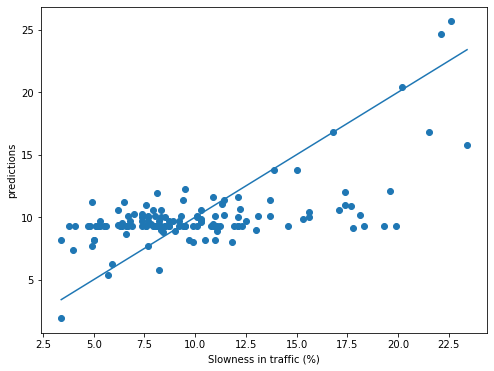

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM)
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.show()

In [44]:
data[(data["Slowness in traffic (%)"]>19)&(data["Slowness in traffic (%)"]<21)]

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
76,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19.6
77,0,1,0,0,0,0,0,0,2,0,3,0,0,0,1,0,20.2
80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.3
105,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.9


¿Cuánto es el error de predicción?

In [14]:
rmse=np.sqrt(np.mean((data["Slowness in traffic (%)"]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 3.434764045262571


Ahora probemos con machine learning a hacer regresiones lineales!

In [15]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [48]:
features=data.drop(columns=["Slowness in traffic (%)"])
target=data["Slowness in traffic (%)"]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.00001, random_state = 42)

In [49]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([8.10726606])

Feature: 0, Score: 0.75011
Feature: 1, Score: -0.02231
Feature: 2, Score: -1.14106
Feature: 3, Score: 0.43496
Feature: 4, Score: 0.19754
Feature: 5, Score: 6.34591
Feature: 6, Score: -1.42338
Feature: 7, Score: -2.59682
Feature: 8, Score: 1.90430
Feature: 9, Score: -1.56902
Feature: 10, Score: 2.01311
Feature: 11, Score: 1.51494
Feature: 12, Score: -1.16175
Feature: 13, Score: -1.23314
Feature: 14, Score: 1.31163
Feature: 15, Score: -3.95400


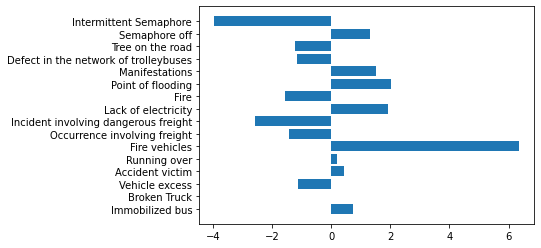

In [50]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var, importance)
plt.show()

Ahora podemos ver que las variables más importantes son las siguientes:

In [51]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [52]:
important.sort_values(by="importance")

,variable,importance
15,Intermittent Semaphore,-3.953998
7,Incident involving dangerous freight,-2.596819
9,Fire,-1.569020
6,Occurrence involving freight,-1.423381
13,Tree on the road,-1.233136
12,Defect in the network of trolleybuses,-1.161754
2,Vehicle excess,-1.141063
1,Broken Truck,-0.022312
4,Running over,0.197537
3,Accident victim,0.434958


Hagamos ahora una nueva prueba solo usando las variables que me hemos conseguido importantes:

In [53]:
predictions_LR=LR.predict(features)

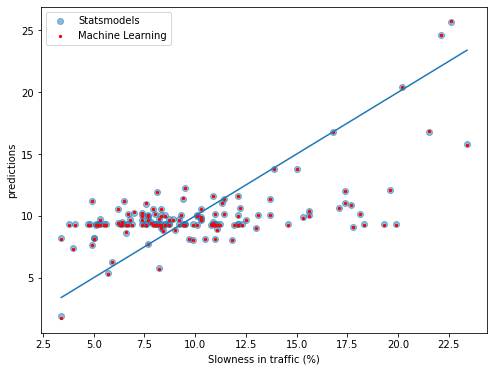

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels",alpha=0.5)
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning",s=5,c="r")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [23]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

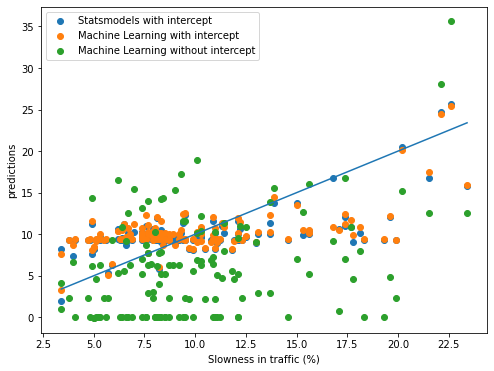

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

¿Cuáles son los errores de los modelos?

In [25]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_SM=r2_score(target,predictions_SM)
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_SM=np.sqrt(mean_squared_error(target,predictions_SM))
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_SM,score_LR,score_LR2],["score_SM","score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2],["RMS2_SM","RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)

score_SM  is  0.3756846527282176
score_LR  is  0.35187998379618113
score_LR2  is  -1.7252278373234984
RMS2_SM  is  3.434764045262571
RMS2_LR  is  3.499633939144508
RMS2_LR2  is  7.176229359897332


Ahora intentemos algunos otros mecanismos no paramétricos para intentar una nueva regresión.
Digamos por ejemplo Random Forest!!!!!

In [60]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state=5678)
 
# fit the regressor with x and y data
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [61]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [62]:
for i,j in zip([score_SM,score_LR,score_LR2,score_RF],["score_SM","score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_SM","RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_SM  is  0.3756846527282176
score_LR  is  0.35187998379618113
score_LR2  is  -1.7252278373234984
score_RF  is  0.6473293209845509
RMS2_SM  is  3.434764045262571
RMS2_LR  is  3.499633939144508
RMS2_LR2  is  7.176229359897332
RMS2_RF  is  2.5815442849876473


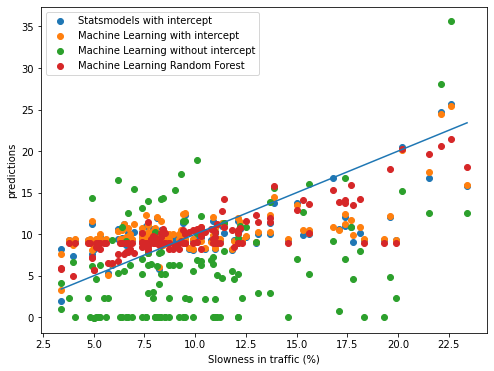

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(data["Slowness in traffic (%)"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_LR2, label="Machine Learning without intercept")
plt.scatter(data["Slowness in traffic (%)"],predictions_RF, label="Machine Learning Random Forest")
u=np.linspace(data["Slowness in traffic (%)"].min(),data["Slowness in traffic (%)"].max(),5)
plt.plot(u,u)
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("predictions")
plt.legend()
plt.show()

¿Cómo podemos predecir ahora a una situacuón como la siguiente???
x_new=[0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0]

In [30]:
x_new=np.array([0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0])
regressor.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.470925])

In [31]:
LR.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.3210267])

In [32]:
LR2.predict(x_new.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.46895309])

Feature: Immobilized bus, Score: 0.05479
Feature: Broken Truck, Score: 0.14554
Feature: Vehicle excess, Score: 0.01797
Feature: Accident victim, Score: 0.07651
Feature: Running over, Score: 0.04226
Feature: Fire vehicles, Score: 0.02988
Feature: Occurrence involving freight, Score: 0.00079
Feature: Incident involving dangerous freight, Score: 0.00086
Feature: Lack of electricity, Score: 0.16000
Feature: Fire, Score: 0.00139
Feature: Point of flooding, Score: 0.29212
Feature: Manifestations, Score: 0.01209
Feature: Defect in the network of trolleybuses, Score: 0.07854
Feature: Tree on the road, Score: 0.01842
Feature: Semaphore off, Score: 0.05598
Feature: Intermittent Semaphore, Score: 0.01286


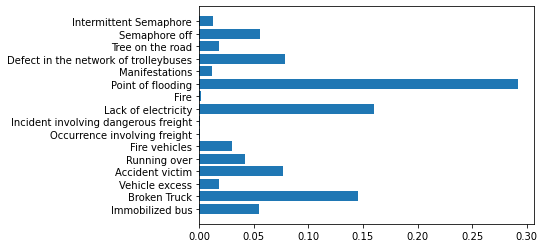

In [33]:
# get importance
var_RF=regressor.feature_names_in_
importance_RF = regressor.feature_importances_
# summarize feature importance
for i,v in zip(var_RF,importance_RF):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var_RF, importance_RF)
plt.show()

In [34]:
from sklearn import tree

In [36]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=800)
tree.plot_tree(regressor.estimators_[0],
               feature_names = X.columns, 
               class_names=["Slow traffic (%)"],
               filled = True, fontsize=4)
fig.savefig('rf_individualtree.png')